# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

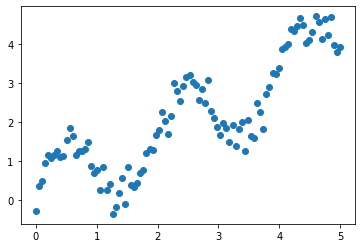

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5737110137546487


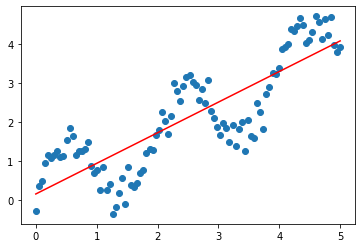

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

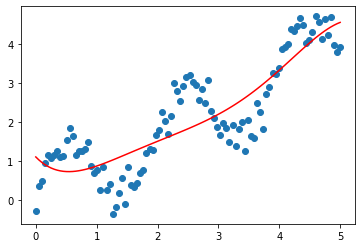

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.61661955  2.17932994 -0.98922217  0.20872906 -0.01592193]
interception:  1.1084486851600084


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.10844869, 1.0322341 , 0.96639163, 0.91020477, 0.86298833,
       0.82408784, 0.79287891, 0.76876659, 0.75118479, 0.73959559,
       0.73348865, 0.73238058, 0.73581428, 0.74335838, 0.75460653,
       0.76917683, 0.78671118, 0.80687467, 0.8293549 , 0.85386144,
       0.88012512, 0.90789744, 0.93694994, 0.96707357, 0.99807806,
       1.02979129, 1.06205867, 1.09474251, 1.12772138, 1.16088951,
       1.19415611, 1.22744482, 1.26069301, 1.29385118, 1.32688234,
       1.35976138, 1.39247443, 1.42501824, 1.45739956, 1.48963448,
       1.52174786, 1.55377263, 1.58574923, 1.61772494, 1.64975326,
       1.68189331, 1.71420913, 1.74676916, 1.7796455 , 1.81291338,
       1.84665046, 1.88093623, 1.91585138, 1.9514772 , 1.9878949 ,
       2.02518501, 2.06342676, 2.10269743, 2.14307175, 2.18462124,
       2.22741361, 2.27151213, 2.31697496, 2.3638546 , 2.41219717,
       2.46204187, 2.51342029, 2.5663558 , 2.62086295, 2.6769468 ,
       2.7346023 , 2.79381371, 2.85455389, 2.91678374, 2.98045

In [15]:
regr_poly.predict(X_poly)

array([1.10844869, 1.0322341 , 0.96639163, 0.91020477, 0.86298833,
       0.82408784, 0.79287891, 0.76876659, 0.75118479, 0.73959559,
       0.73348865, 0.73238058, 0.73581428, 0.74335838, 0.75460653,
       0.76917683, 0.78671118, 0.80687467, 0.8293549 , 0.85386144,
       0.88012512, 0.90789744, 0.93694994, 0.96707357, 0.99807806,
       1.02979129, 1.06205867, 1.09474251, 1.12772138, 1.16088951,
       1.19415611, 1.22744482, 1.26069301, 1.29385118, 1.32688234,
       1.35976138, 1.39247443, 1.42501824, 1.45739956, 1.48963448,
       1.52174786, 1.55377263, 1.58574923, 1.61772494, 1.64975326,
       1.68189331, 1.71420913, 1.74676916, 1.7796455 , 1.81291338,
       1.84665046, 1.88093623, 1.91585138, 1.9514772 , 1.9878949 ,
       2.02518501, 2.06342676, 2.10269743, 2.14307175, 2.18462124,
       2.22741361, 2.27151213, 2.31697496, 2.3638546 , 2.41219717,
       2.46204187, 2.51342029, 2.5663558 , 2.62086295, 2.6769468 ,
       2.7346023 , 2.79381371, 2.85455389, 2.91678374, 2.98045

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

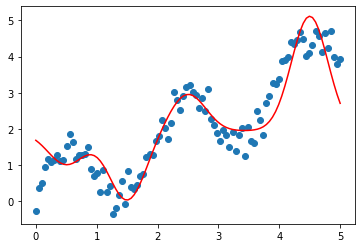

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.88994038 -1.87502172  1.05416614  0.03558135  3.20787105]
interception:  1.906065359092572


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

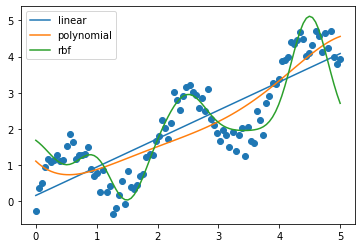

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5737110137546487


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.48407635531174653


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2830622465195545
